Q1. Gender Classification

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA (countplots, show images, find missing values etc.)

a. Use Base SVM(LinearSVC) model.

b. Create a CNN model with 3 Conv2D layers, 3 Maxpooling2D layers, any extra layers necessary.

c. Get atleast 90% test accuracy using the above CNN model.

Data: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

data_dir = '/content/drive/MyDrive/mid1.zip'

In [ ]:
import zipfile


zip_file = zipfile.ZipFile("/content/drive/MyDrive/mid1.zip")


zip_file.extractall()


zip_file.close()



In [ ]:
import os
root_path =('./content/Training')
male_path = os.path.join('./content/Training/male')
female_path = os.path.join('./content/Training/female')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import *
datagen = ImageDataGenerator(rescale=1/255)

train_generator = datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(50, 50),  # All images will be resized to50,50
        batch_size=80,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 47009 images belonging to 2 classes.


In [ ]:
mkdir ./content

In [ ]:
mkdir ./content/Training

In [ ]:
root_path= '/content/Training'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(os.path.join(root_path, name))) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [ ]:
root_path = '/content/Training'
male_path = os.path.join(root_path, 'male')
female_path = os.path.join(root_path, 'female')
male_images = [os.path.join(male_path, img) for img in os.listdir(male_path)]
female_images = [os.path.join(female_path, img) for img in os.listdir(female_path)]

In [ ]:
X = male_images + female_images
y = np.concatenate([np.zeros(len(male_images)), np.ones(len(female_images))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

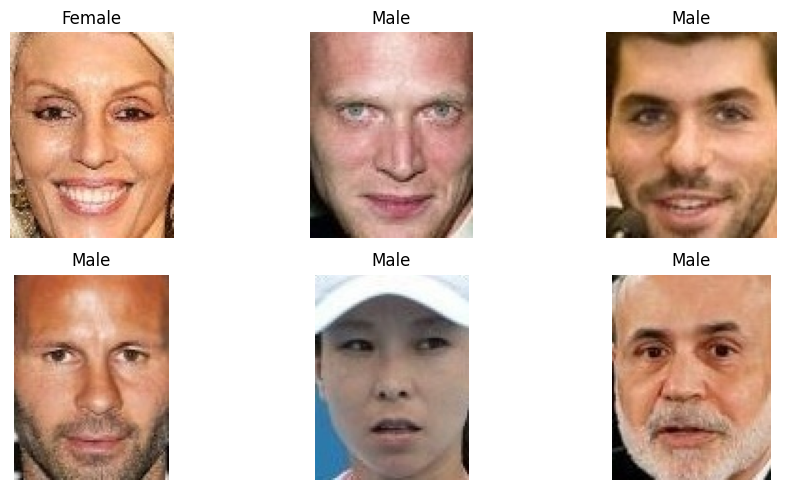

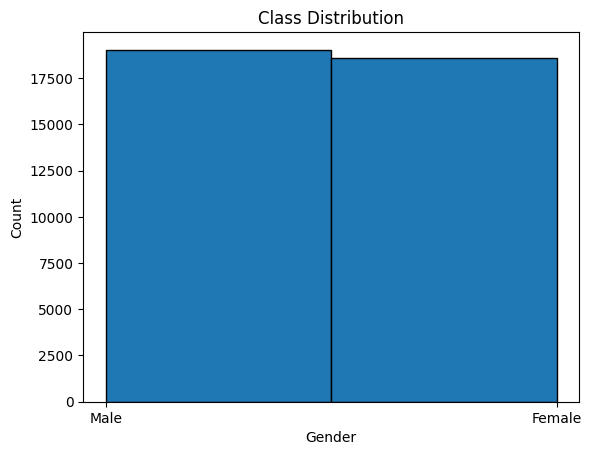

In [ ]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(6):
        img = Image.open(images[i])
        num = int(i + 1)
        plt.subplot(2, 3, num)
        plt.imshow(img)
        plt.title('Male' if labels[i] == 0 else 'Female')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_images(X_train, y_train)
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svm_model = make_pipeline(CountVectorizer(), LinearSVC())
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", svm_accuracy)


Accuracy: 1.0


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/Training',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)

valid_generator = datagen.flow_from_directory(
    '/content/Validation',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary'
)
history = cnn_model.fit(train_generator, validation_data=valid_generator, epochs=40)
test_loss, test_accuracy = cnn_model.evaluate(valid_generator)
print("CNN Test Accuracy:", test_accuracy)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Epoch 1/40
735/735 [==============================] - 35s 43ms/step - loss: 0.2454 - accuracy: 0.8962 - val_loss: 0.1224 - val_accuracy: 0.9581
Epoch 2/40
735/735 [==============================] - 33s 45ms/step - loss: 0.1424 - accuracy: 0.9494 - val_loss: 0.1101 - val_accuracy: 0.9615
Epoch 3/40
735/735 [==============================] - 35s 47ms/step - loss: 0.1231 - accuracy: 0.9564 - val_loss: 0.1047 - val_accuracy: 0.9605
Epoch 4/40
735/735 [==============================] - 32s 43ms/step - loss: 0.1100 - accuracy: 0.9602 - val_loss: 0.1080 - val_accuracy: 0.9605
Epoch 5/40
735/735 [==============================] - 31s 43ms/step - loss: 0.1024 - accuracy: 0.9635 - val_loss: 0.0996 - val_accuracy: 0.9638
Epoch 6/40
735/735 [==============================] - 31s 43ms/step - loss: 0.0904 - accuracy: 0.9678 - val_loss: 0.1057 - val_accuracy: 0.9607
Epoch 7/40
735/735 [==============================


Q2. Cement Strength Regression

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA.

a. Use Linear, Ridge, and Lasso Regression.

b. Show results of the best model (least test data mean squared error) using a loop to compare the values.

c. Create any neural network you feel like making (RNN, CNN, ANN, or any other) and achieve a test data mean squared error lesser than the best model in part b.

Data: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/concrete_data.csv')#https://archive.ics.uci.edu/dataset/43/haberman+s+survival
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

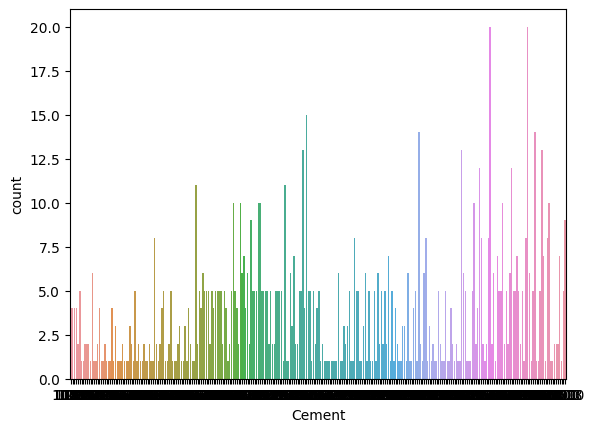

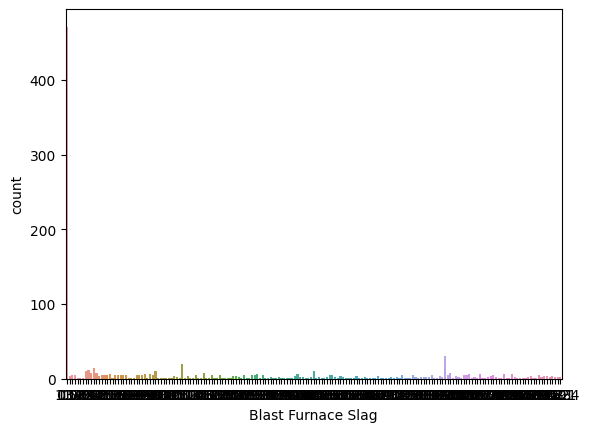

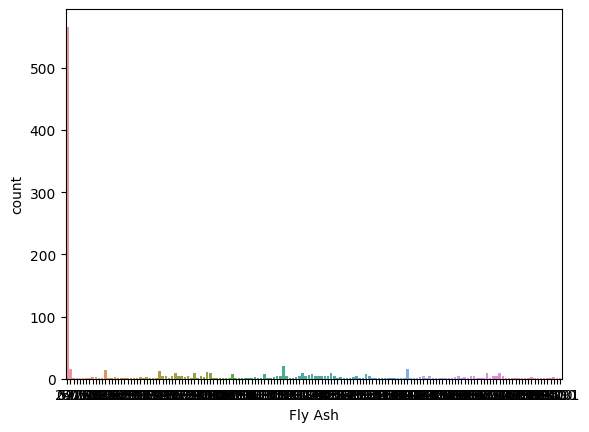

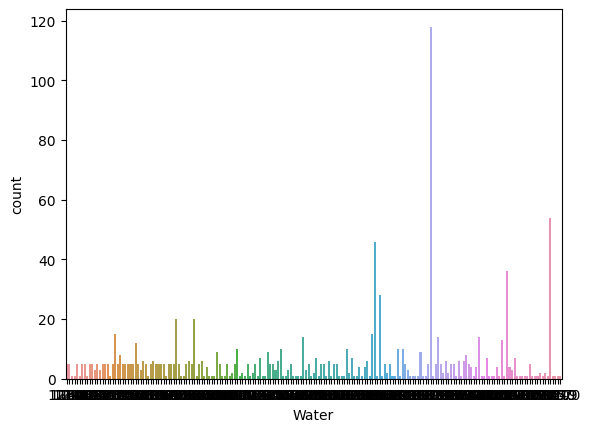

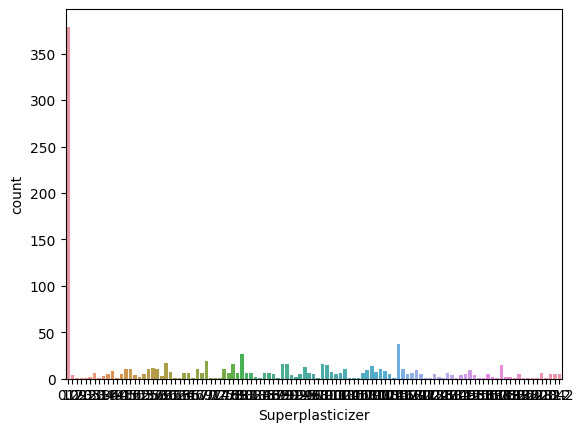

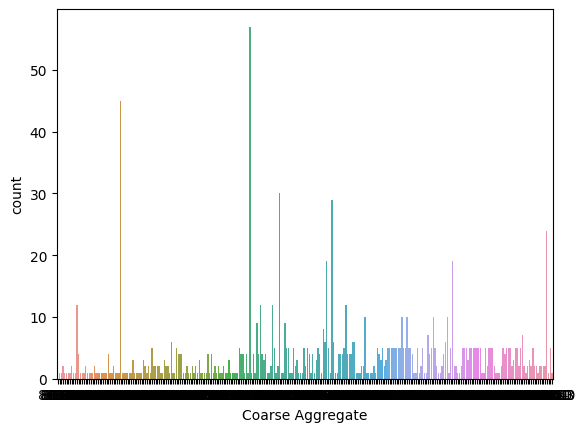

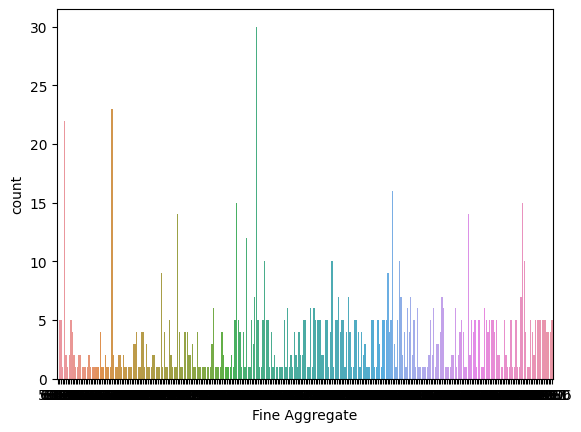

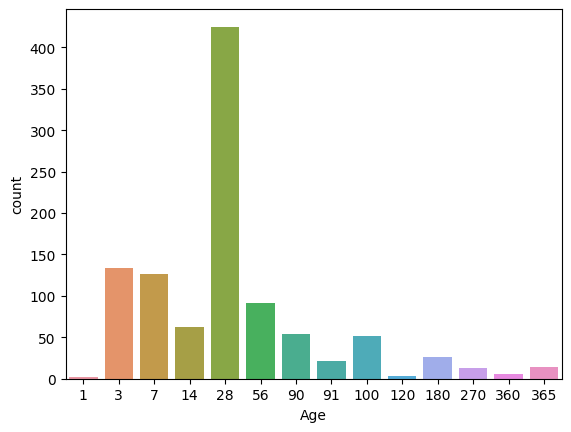

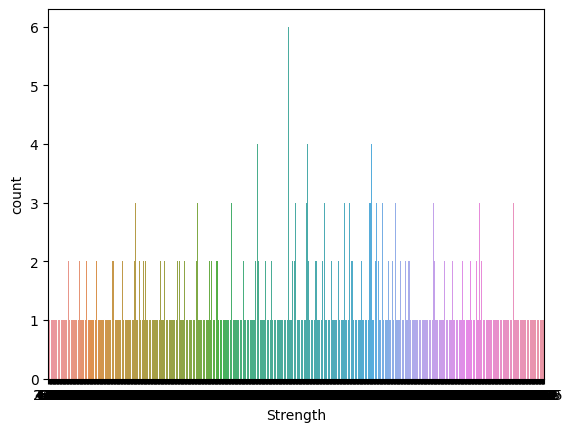

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    ax = sns.countplot(x=df[i],data=df)
    plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


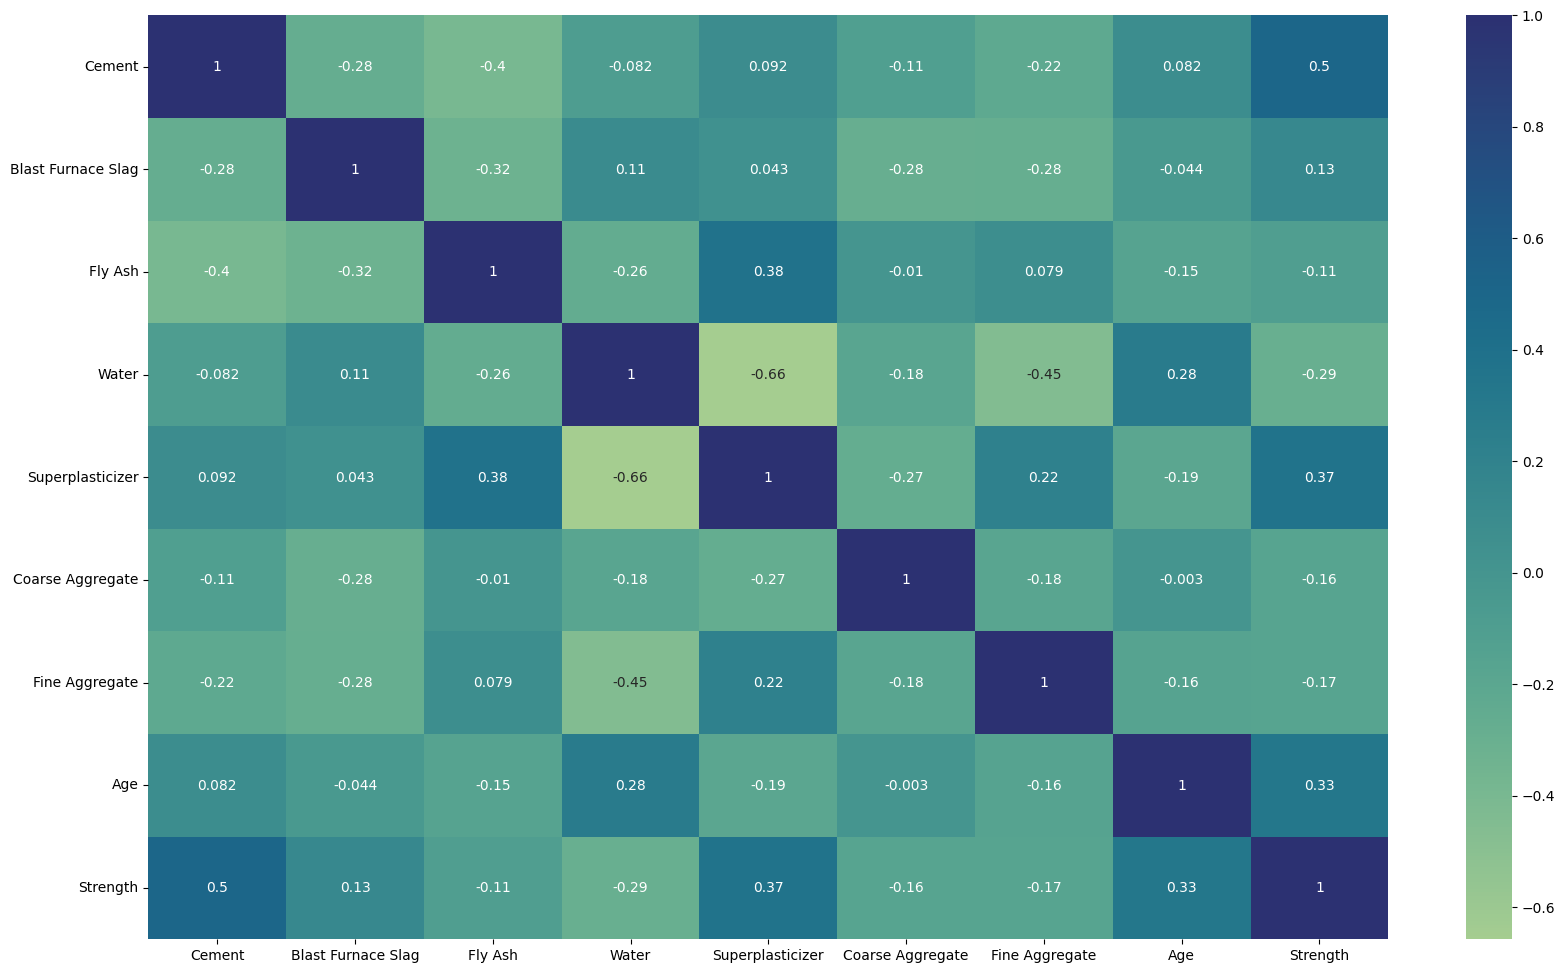

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap = 'crest', annot = True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x = df.drop(['Strength'],axis = 1)
y = df['Strength']

In [8]:
print(x)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  
0               1040.0           676.0   28  
1               1055.0           676.0   28  
2                932.

In [9]:
print(y)

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.5,random_state =42)

In [11]:
x_train.shape

(515, 8)

In [12]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression()
rg.fit(x, y)
y_pred = rg.predict(x)
y_pred

array([53.46346329, 53.73475651, 56.81258504, ..., 26.46841169,
       29.12237014, 31.89770807])

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(rg, x, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-validation scores:", scores)
print("mean_squared_error:", -1*scores.mean())

Cross-validation scores: [ -95.97094009 -135.90774028 -125.31845271  -90.91319472 -106.86456281]
mean_squared_error: 110.99497812354932


In [14]:
from sklearn.metrics import mean_squared_error
mse = np.mean((y - y_pred) ** 2)

print("Mean Squared Error:", mse)

#or

print(mean_squared_error(y,y_pred))

Mean Squared Error: 107.19723607486019
107.19723607486019


In [15]:
from sklearn.linear_model import Ridge,Lasso

clfs = [LinearRegression(),Ridge(),Lasso()]

for i,clf in enumerate(clfs):
  clf.fit(x, y)
  kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
  scores = cross_val_score(clf, x, y, cv=kf, scoring='neg_mean_squared_error')
  print("r2 score:", -1*scores.mean())

r2 score: 110.99497812354932
r2 score: 110.99484725121674
r2 score: 111.03333860016042


In [16]:
def best_model_getter(clf):
  parameters = {
      'alpha': [x/100 for x in range(0,1001)]
  }
  grid_search = GridSearchCV(clf, parameters, n_jobs=-1,scoring = 'neg_mean_squared_error')
  grid_search.fit(x, y)

  return grid_search.best_estimator_

In [17]:
from sklearn.model_selection import GridSearchCV
clfs2 = [Ridge(),Lasso()]
for clf in clfs2:
  bm = best_model_getter(clf)
  print('Best Model = ',bm)
  bm.fit(x, y)
  kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
  scores = cross_val_score(bm, x, y, cv=kf, scoring='neg_mean_squared_error')
  print("mean_squared_error:", -1*scores.mean())
#notice how error increased for ridge
#thats how u know to never fully trust the grid search algorithm, instead use your intellect :)

Best Model =  Ridge(alpha=10.0)
mean_squared_error: 110.99367173152817
Best Model =  Lasso(alpha=6.9)
mean_squared_error: 111.23059680052761


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
import graphviz

In [19]:
# Creating the model
model = Sequential()

# Inputing the first layer with input dimensions
model.add(Dense(128,
                activation='relu',
                input_dim=8,
                kernel_initializer='uniform'))

# model.add(Dropout(0.50))

#adding second hidden layer
model.add(Dense(32,
                kernel_initializer='uniform',
                activation='relu'))

#adding second hidden layer
model.add(Dense(32,
                kernel_initializer='uniform',
                activation='relu'))

# Adding another Dropout layer
# model.add(Dropout(0.50))

model.add(Dense(1,
                kernel_initializer='uniform'))

#Visualizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,369
Trainable params: 6,369
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Creating an Stochastic Gradient Descent
sgd = SGD(lr = 0.02, momentum = 0.9)

# Compiling our model
model.compile(optimizer = 'adam',
                   loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 30, epochs = 100, verbose=2)

Epoch 1/100
18/18 - 6s - loss: 1251.6893 - 6s/epoch - 341ms/step
Epoch 2/100
18/18 - 0s - loss: 316.9561 - 55ms/epoch - 3ms/step
Epoch 3/100
18/18 - 0s - loss: 281.7861 - 55ms/epoch - 3ms/step
Epoch 4/100
18/18 - 0s - loss: 252.8463 - 53ms/epoch - 3ms/step
Epoch 5/100
18/18 - 0s - loss: 227.7917 - 53ms/epoch - 3ms/step
Epoch 6/100
18/18 - 0s - loss: 226.1599 - 53ms/epoch - 3ms/step
Epoch 7/100
18/18 - 0s - loss: 201.7728 - 51ms/epoch - 3ms/step
Epoch 8/100
18/18 - 0s - loss: 187.9209 - 61ms/epoch - 3ms/step
Epoch 9/100
18/18 - 0s - loss: 175.7619 - 61ms/epoch - 3ms/step
Epoch 10/100
18/18 - 0s - loss: 160.2464 - 60ms/epoch - 3ms/step
Epoch 11/100
18/18 - 0s - loss: 145.8857 - 51ms/epoch - 3ms/step
Epoch 12/100
18/18 - 0s - loss: 135.7645 - 51ms/epoch - 3ms/step
Epoch 13/100
18/18 - 0s - loss: 130.5971 - 57ms/epoch - 3ms/step
Epoch 14/100
18/18 - 0s - loss: 120.5342 - 54ms/epoch - 3ms/step
Epoch 15/100
18/18 - 0s - loss: 113.1405 - 61ms/epoch - 3ms/step
Epoch 16/100
18/18 - 0s - loss: 1

In [21]:
scores = model.evaluate(x_train, y_train, batch_size=30)

18/18 [==============================] - 0s 2ms/step - loss: 46.8644
